*Read section 2.2.2 of the book before using these notes.*

*Note that in this course, lecture notes are not sufficient, you must read the book for better understanding. Lecture notes are just implementing the concepts of the book on a dataset, but not explaining the concepts elaborately.*

In this chapter, we will show that a flexible model is likely to have high variance and low bias, while a relatively less flexible model is likely to have a high bias and low variance.

The examples considered below are motivated from the examples shown in the documentation of the [bias_variance_decomp()](https://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/) function from the `mlxtend` library. We will first manually compute the bias and variance for understanding of the concept. Later, we will show application of the `bias_variance_decomp()` function to estimate bias and variance.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
sns.set(font_scale=1.35)

## Simple model (Less flexible)

Let us consider a linear regression model as the less-flexible *(or relatively simple)* model.

We will first simulate the test dataset for which we will compute the bias and variance.

In [ ]:
np.random.seed(101)

# Simulating predictor values of test data
xtest = np.random.uniform(-15, 10, 200)

# Assuming the true mean response is square of the predictor value
fxtest = xtest**2

# Simulating noiseless test response 
ytest = fxtest

# We will find bias and variance using a linear regression model for prediction
model = LinearRegression()

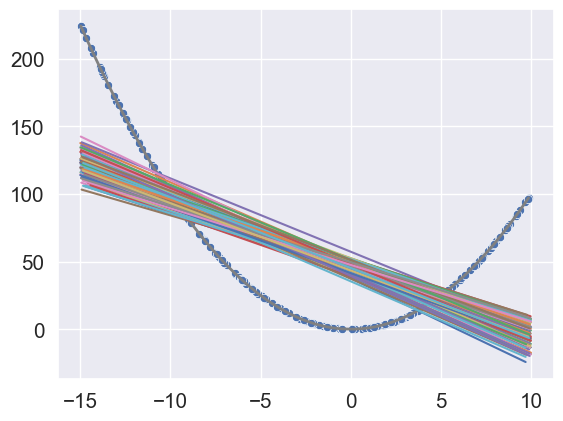

In [3]:
# Visualizing the data and the true mean response
sns.scatterplot(x = xtest, y = ytest)
sns.lineplot(x = xtest, y = fxtest, color = 'grey', linewidth = 2)

# Initializing objects to store predictions and mean squared error
# of 100 models developed on 100 distinct training datasets samples
pred_test = []; mse_test = []

# Iterating over each of the 100 models
for i in range(100):
    np.random.seed(i)
    
    # Simulating the ith training data
    x = np.random.uniform(-15, 10, 200)
    fx = x**2
    y = fx + np.random.normal(0, 10, 200)
    
    # Fitting the ith model on the ith training data
    model.fit(x.reshape(-1,1), y)
    
    # Plotting the ith model
    sns.lineplot(x = x, y = model.predict(x.reshape(-1,1)))
    
    # Storing the predictions of the ith model on test data
    pred_test.append(model.predict(xtest.reshape(-1,1)))
    
    # Storing the mean squared error of the ith model on test data
    mse_test.append(mean_squared_error(model.predict(xtest.reshape(-1,1)), ytest))

The above plots show that the 100 models seem to have low variance, but high bias. Note that the bias is low only around a couple of points *(x = -10 & x = 5)*.

Let us compute the average squared bias over all the test data points.

In [4]:
mean_pred = np.array(pred_test).mean(axis = 0)
sq_bias = ((mean_pred - fxtest)**2).mean()
sq_bias

2042.104126728109

Let us compute the average variance over all the test data points.

In [5]:
mean_var = np.array(pred_test).var(axis = 0).mean()
mean_var

28.37397844429763

Let us compute the mean squared error over all the test data points.

In [6]:
np.array(mse_test).mean()

2070.4781051724062

Note that the mean squared error should be the same as the sum of squared bias, variance, and irreducible error.

The sum of squared bias, model variance, and irreducible error is:

In [7]:
sq_bias + mean_var + 100

2170.4781051724067

Note that this is approximately, but not exactly, the same as the mean squared error computed above as we are developing a finite number of models, and making predictions on a finite number of test data points. 

## Complex model (more flexible)

Let us consider a decion tree as the more flexible model. 

In [8]:
np.random.seed(101)
xtest = np.random.uniform(-15, 10, 200)
fxtest = xtest**2
ytest = fxtest + np.random.normal(0, 10, 200)
model = DecisionTreeRegressor()

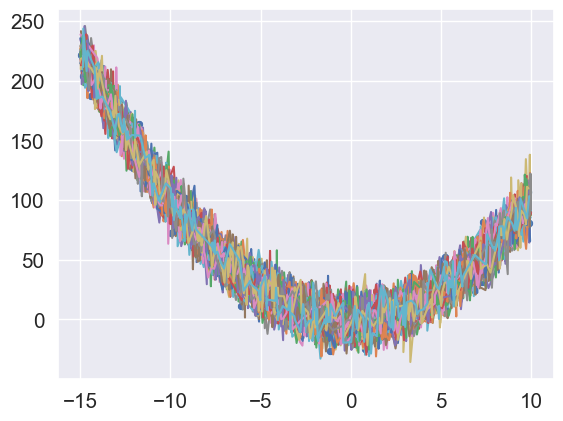

In [9]:
sns.scatterplot(x = xtest, y = ytest)
sns.lineplot(x = xtest, y = fxtest, color = 'grey', linewidth = 2)
pred_test = []; mse_test = []
for i in range(100):
    np.random.seed(i)
    x = np.random.uniform(-15, 10, 200)
    fx = x**2
    y = fx + np.random.normal(0, 10, 200)
    model.fit(x.reshape(-1,1), y)
    sns.lineplot(x = x, y = model.predict(x.reshape(-1,1)))
    pred_test.append(model.predict(xtest.reshape(-1,1)))
    mse_test.append(mean_squared_error(model.predict(xtest.reshape(-1,1)), ytest))

The above plots show that the 100 models seem to have high variance, but low bias. 

Let us compute the average squared bias over all the test data points.

In [10]:
mean_pred = np.array(pred_test).mean(axis = 0)
sq_bias = ((mean_pred - fxtest)**2).mean()
sq_bias

1.3117561629333938

Let us compute the average model variance over all the test data points.

In [11]:
mean_var = np.array(pred_test).var(axis = 0).mean()
mean_var

102.5226748977198

Let us compute the average mean squared error over all the test data points.

In [12]:
np.array(mse_test).mean()

225.92027460924726

Note that the above error is approximately the same as the sum of the squared bias, model variance and the irreducible error.

Note that the relatively more flexible model has a higher variance, but lower bias as compared to the less flexible linear model. This will typically be the case, but may not be true in all scenarios. We will discuss one such scenario later.